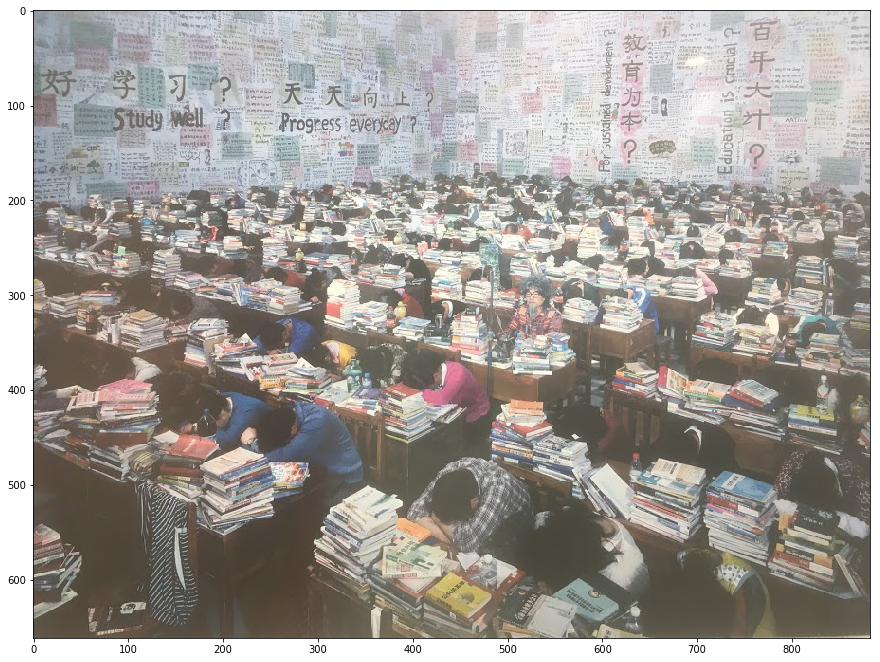

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
#from skimage import data
import numpy as np
photo=plt.imread('IMG_3023.JPG')
plt.figure(figsize=(15,15))
plt.imshow(photo)

### Turn black areas to orange

In [2]:
photo.shape

(662, 883, 3)

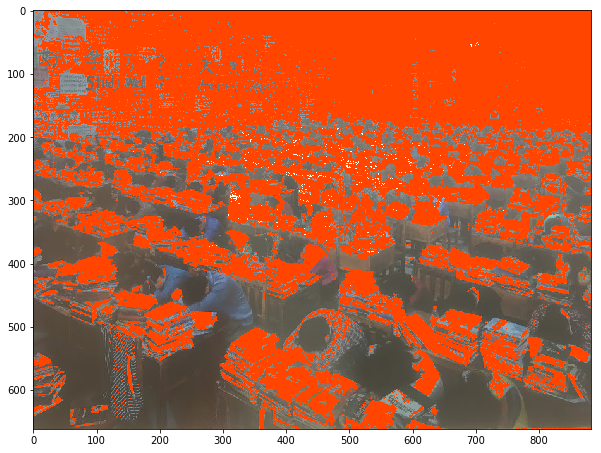

In [3]:
red_filter=photo[:,:,0]>150
green_filter=photo[:,:,1]<255
blue_filter=photo[:,:,2]<255
photo = imageio.imread('IMG_3023.jpg')
plt.figure(figsize=(10,10))
final_filter=np.logical_and(red_filter,green_filter,blue_filter)
photo[final_filter]=[255,69,0]
plt.imshow(photo)

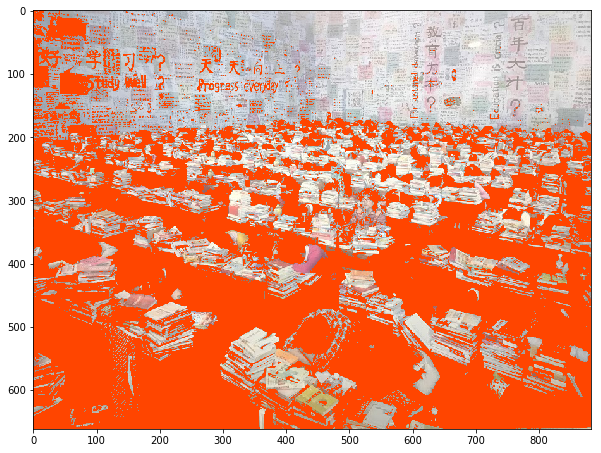

In [4]:
red_filter=photo[:,:,0]<150
green_filter=photo[:,:,1]<255
blue_filter=photo[:,:,2]<255
photo = imageio.imread('IMG_3023.jpg')
plt.figure(figsize=(10,10))
final_filter=np.logical_and(red_filter,green_filter,blue_filter)
photo[final_filter]=[255,69,0]
plt.imshow(photo)

### Bubbles

In [5]:
nb_rows,nb_columns,layer=photo.shape
X, Y = np.ogrid[:nb_rows, :nb_columns]
dist_from_center=(X-nb_rows/2)**2+(Y-nb_columns/2)**2
radius=(nb_rows/2)**2
radius

109561.0

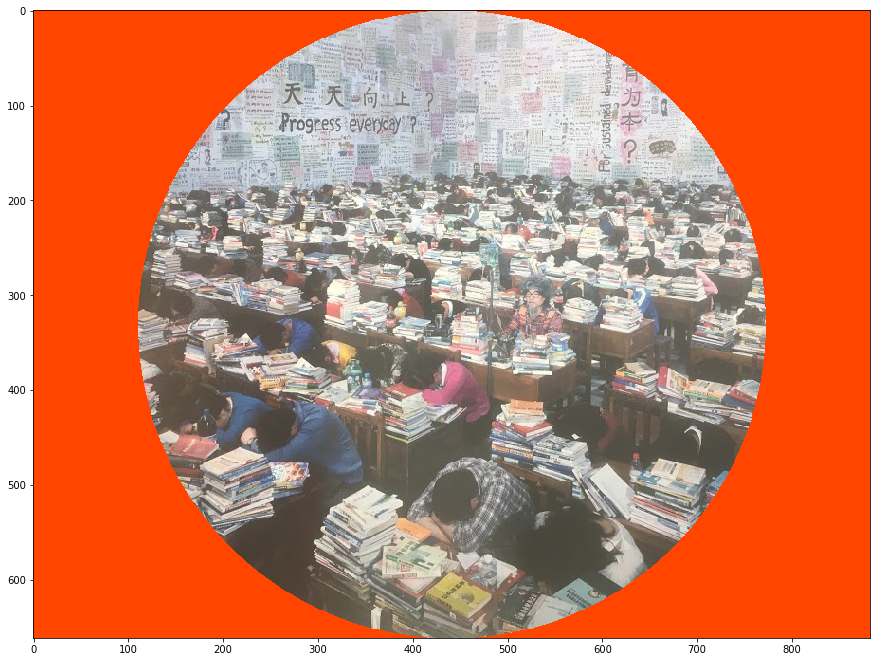

In [6]:
photo= imageio.imread('IMG_3023.jpg')
photo[dist_from_center>radius] = [255,69,0]
plt.figure(figsize=(15,15))
plt.imshow(photo)

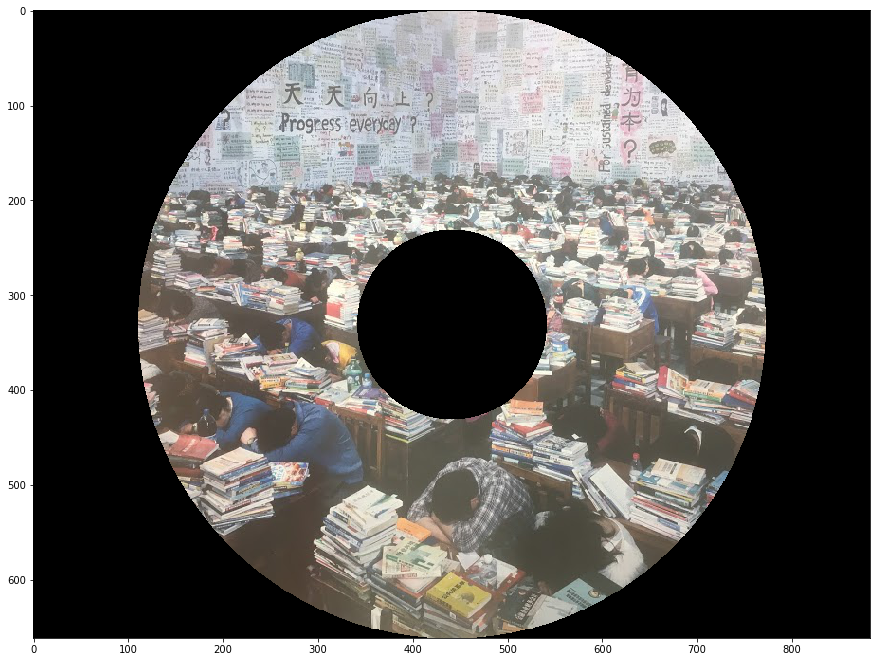

In [7]:
photo= imageio.imread('IMG_3023.jpg')
final_filter=np.logical_and(dist_from_center>10000,dist_from_center<radius)
photo[~final_filter]=0
plt.figure(figsize=(15,15))
plt.imshow(photo)

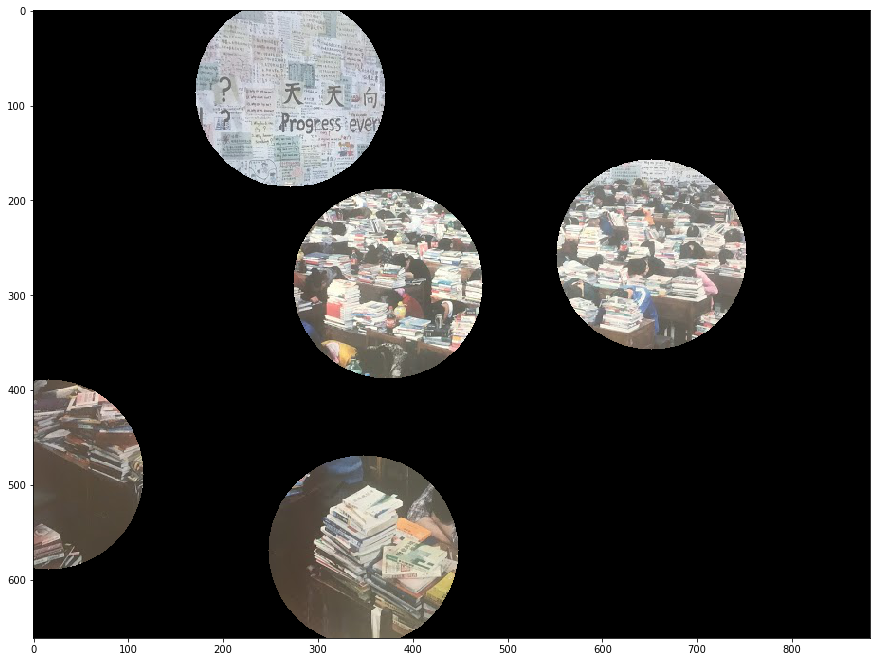

In [8]:
import random
photo= imageio.imread('IMG_3023.jpg')
i=0
dist_from_dot=[]
center=[]
while i<5:
    center.append([random.randint(0,nb_rows),random.randint(0,nb_columns)])
    dist_from_dot.append((X-center[i][0])**2+(Y-center[i][1])**2)
    i+=1
photo= imageio.imread('IMG_3023.jpg')
dots_filter=np.logical_and(np.logical_and(dist_from_dot[0]>10000,dist_from_dot[1]>10000),np.logical_and(np.logical_and(dist_from_dot[2]>10000,dist_from_dot[3]>10000),dist_from_dot[4]>10000)
)
photo[dots_filter] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo)

### Finding Waldo
https://github.com/Qarj/search-image

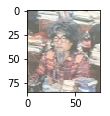

In [9]:
waldo=plt.imread('Waldo.JPG')
plt.figure(figsize=(1.5,1.5))
plt.imshow(waldo)

In [10]:
import cv2
#cv2 (python-opencv): vector transformations applied to images

In [11]:
im = cv2.imread('IMG_3023.jpg')
tmp = cv2.imread('Waldo.JPG')

In [12]:
image_size = im.shape[:2]
template_size = tmp.shape[:2]
print ('image_size (y,x)', image_size)
print ('template_size (y,x)', template_size)

image_size (y,x) (662, 883)
template_size (y,x) (85, 76)


In [13]:
result_size = [ s[0] - s[1] + 1 for s in zip(image_size, template_size) ] #883-74+1 and 662-81+1
result_size = [ result_size[1], result_size[0] ] # reverse values to change y,x to x,y
print ('result_size - x,y', result_size)
result = np.zeros((result_size[0], result_size[1], 3), np.uint8)
result = cv2.matchTemplate(im, tmp, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

result_size - x,y [808, 578]


In [14]:
confidence = (9999999999 - min_val) / 100000000
print ('primary confidence', '%.2f %%' % confidence)

altconfidence = 100 - ((min_val / max_val)*100)
print ('alternate confidence', '%.2f %%' % altconfidence)

if (altconfidence > 99) or ((confidence > 97) and (altconfidence > 93)) or ((confidence > 95.7) and (altconfidence > 96.3)):
   print ('The image of size', template_size, '(y,x) was found at', min_loc)
else:
   print ('The image was not found')

primary confidence 99.98 %
alternate confidence 98.91 %
The image of size (85, 76) (y,x) was found at (493, 270)


(312, 531)

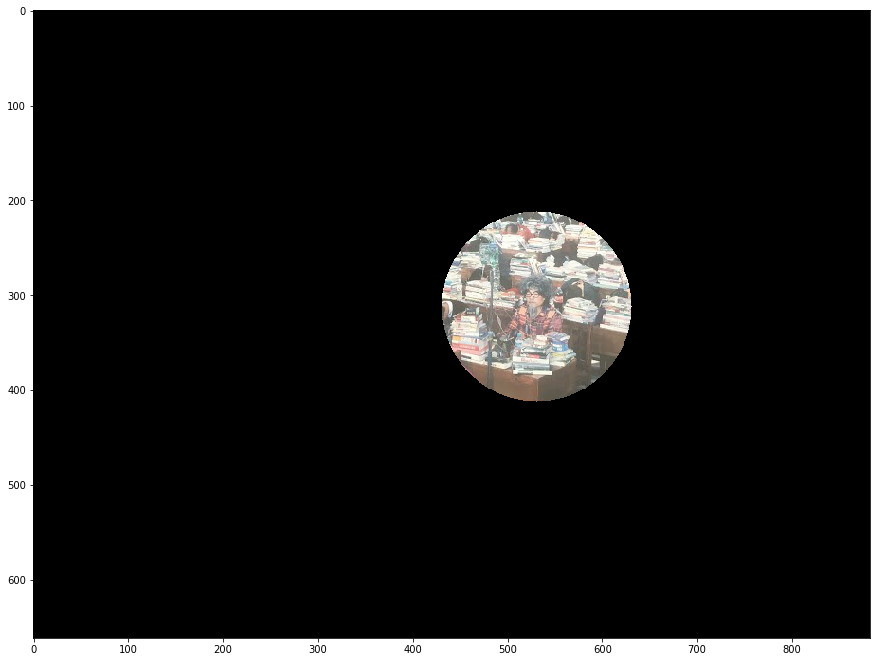

In [25]:
photo= imageio.imread('IMG_3023.jpg')
center_waldo=(round(min_loc[1]+85/2),round(min_loc[0]+76/2))
dist_from_waldo=(X-center_waldo[0])**2+(Y-center_waldo[1])**2
photo[dist_from_waldo>10000] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo)
center_waldo